# 1. Эффективная размерность

На лекции вы познакомились с такими методами понижения размерности выборки, как PCA и t-SNE. За скобками был оставлен вопрос о том, каким образом определить оптимальную размерность выборки, то есть такую размерность, при переходе к которой мы потеряем пренебрежимо мало информации и сможем решать исходную задачу без существенных потерь в качестве.

В этом задании мы предлагаем вам самостоятельно реализовать один из возможных алгоритмов оценки оптимальной (эффективной) размерности, который часто называют методом крутого склона.

Работать мы будем в рамках простейших предположений о линейности исходной выборки (будем предполагать, что координаты объектов в датасете связаны линейной зависимостью с некоторым гауссовским шумом), то есть будем работать с алгоритмом PCA. Один из возможных взглядов на алгоритм PCA предполагает работу с сингулярными значениями матрицы признакового описания X, то есть собственными числами матрицы $X^TX$. Запишем их так, чтобы эти числа были упорядочены по убыванию $σ_1 \geq σ_2 \geq σ_3 \geq ... \geq σ_n$. Теперь нас интересует некоторая размерность $p$, такая что первые $p$ координат несут основную информацию, записанную в матрице $X$. Возможность существования такой размерности, а также факт того, что именно этим $p$ координатам соответствуют наибольшие по модулю сингулярные значения, неочевидны. В рамках данного задания мы примем это утверждение на веру. Тем не менее мы предлагаем вам ознакомиться с теоретическим обоснованием этого утверждения, например, в этом [источнике](http://www.machinelearning.ru/wiki/index.php?title=Метод_Белсли).

Для оценки оптимальной размерности $p$ предлагается следующий алгоритм: рассмотрим характеристику $E_m = \frac{σ_{m + 1}+...+σ_n}{σ_1 + ... + σ_n}$. В рамках предположения о линейности выборки следует ожидать следующий эффект: при некотором $m$ достигается существенное уменьшение дисперсии координат объектов выборки вдоль $m$-й оси, что приводит к резкому уменьшению значения $σ_{m + 1}$ по сравнению с $σ_m$. Наблюдать это резкое снижение можно на графике зависимости $E_m(m)$. Именно такой метод мы и предлагаем вам реализовать. Этот метод получил название метода крутого склона в связи с характерным видом графика $E_m(m)$.

1. Загрузите данные по [ссылке](https://drive.google.com/drive/folders/1pS7vJJxGHwKe5VVSRVJWDKnd1pPKclN8?usp=sharing)

2. Напишите функцию $E_m$, реализующую предложенный выше метод
3. Найдите такой минимальный $m$, такой что $E_m < 0.2$

В ответе укажите найденное число $m$.

#### Примечания

* Для загрузки массивов из файла можете воспользоваться функцией $np.load$
* В данном задании $m$ - это номер, а не индекс, то есть начинается с 1

In [35]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

X = np.load('data/Homework 8/PCA.npy')

In [41]:
def E(X: np.array) -> np.array:
    U, D, V = np.linalg.svd(X)
    D = np.sort(D)[::-1]
    res = []
    for m, x in enumerate(D, 1):
        e = D[m:].sum() / D.sum()
        res.append([e, m])
    return np.array(res)

12.0


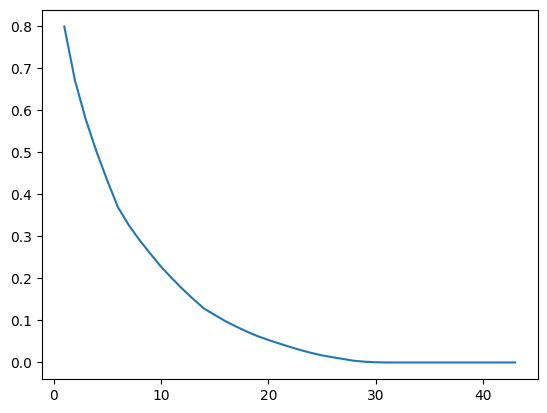

In [55]:
score = E(X)

e = E(X)[:, 0]
m = E(X)[:, 1]

plt.plot(m, e)

print(score[score[:, 0] < 0.2, 1].min())

# 2. PCA

На лекции вы узнали об одном из самых сильных и часто используемых методов понижения размерности - [методе главных компонент](https://colab.research.google.com/drive/1ldt1uUd8bJwiuUHrp2xmTKjELYVLcdzZ#scrollTo=mAiVLZc6zFCd) (Principal Components Analysis, PCA).

В этом задании вам предстоит воспользоваться реализацией этого метода из стандартных библиотек. Мы предлагаем вам использовать класс [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

Ваша задача найти оптимальное количество компонент, которое нужно для максимизации качества решения задачи многоклассовой классификации на основе датасета MNIST при помощи __логистической регрессии__.

В качестве random_state используйте значение 42. Не забудьте использовать StandardScaler.

Ваша задача - определить, какая размерность PCA из `[1,3,5,10,15,20,30,40,50,60]` оптимальна для решения задачи классификации.

В ответе укажите значение n_components, при котором Вы получили наилучший результат на тестовой выборке. Под качеством мы подразумеваем accuracy_score.

#### Примечания
* Для вычисления accuracy можете воспользоваться функцией sklearn.metrics.accuracy_score
* Если получится найти несколько n_components с одинаковым качеством классификации, выберите минимальное из них

Для решения задачи мы возьмём только 2000 первых картинок. Это количество оптимально с точки зрения времени решения задачи и возможностей алгоритма. Просим Вас не изменять это значение, поскольку это может привести к изменению ответа.

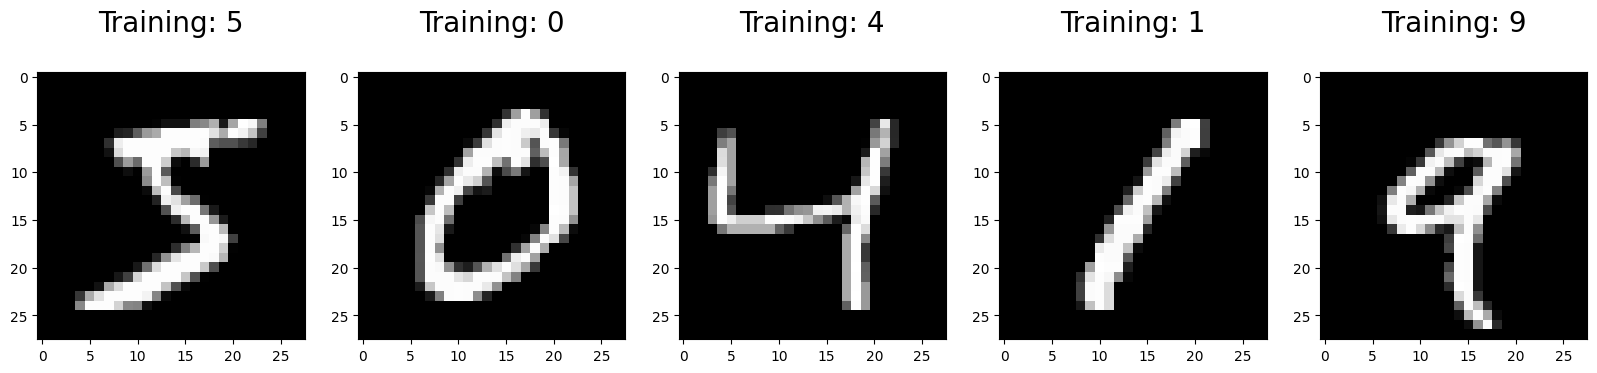

In [56]:
import numpy as np 
import matplotlib.pyplot as plt


from sklearn.datasets import fetch_openml

np.random.seed(42)

mnist = fetch_openml('mnist_784')

X = mnist.data.to_numpy()
y = mnist.target.to_numpy()


X = X[:2000]
y = y[:2000]

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X[0:5], y[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %s\n' % label, fontsize = 20)

Ваша задача - определить какая размерность PCA из `[1,3,5,10,15,20,30,40,50,60]` оптимальна для решения задачи классификации. Обязательно установите параметр `max_iter=500` при создании объекта класса `sklearn.linear_model.LogisticRegression`.

В тестовую выборку отправьте 30% объектов. В качестве random_state используйте число 42 везде, где это необходимо.

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [69]:
pca_components = [1, 3, 5, 10, 15, 20, 30, 40, 50, 60]


X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

score = []
for n_components in pca_components:
    pca = PCA(n_components=n_components, random_state=42)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    clf = LogisticRegression(max_iter=500, random_state=42)
    clf.fit(X_train_pca, y_train)
    predict = clf.predict(X_test_pca)
    metric = accuracy_score(y_test, predict)
    score.append([metric, n_components])

score = np.array(score)

print(int(score[np.argmax(score[:, 0]), 1]))